***

# Python Libraries for Data Explorers
### Babak Tourani
### UBS
### UKOUG, December 2018 

***

## Table Of Contents
1. Python is simple<br/>
1.1. Python Native Collections<br/>
1.1.1. Tuple<br/>
1.1.2. List<br/>
1.1.3. Dictionary<br/>
1.2. Functions and Control Structures<br/>
<br/>
2. Pandas<br/>
2.1. Loading Data<br/>
2.2. DataFrames<br/>
2.2.1. Index, Columns and Data<br/>
2.2.2. Series<br/>
2.2.3. Single Command Data Examination<br/>
2.2.4. Selecting Data<br/>
2.2.5. Query<br/>
2.2.6. Slicing Using integer location<br/>
2.2.7. Slicing Using Labels and Locations<br/>
2.2.8. Group By<br/>
2.2.9. Join & Merge<br/>
<br/>
3. PandaSQL<br/>
<br/>
4. Visualisation<br/>
4.1. Matplotlib<br/>
4.2. Seaborn<br/>
<br/>
5. Resources<br/>
5.1. How To Install Jupyterlab?<br/>
5.2. Tutorial: Python<br/>
5.3. Tutorial: Pandas<br/>
5.4. Tutorial: Matplotlib<br/>
5.5. Tutorial: Seaborn<br/>

**Questions:**<br/>
- Which countries have had the highest number of F1 teams?<br/>
- Which drivers have raced more than others?
- Which drivers have spent most of their careers racing for one team?
- What has been the effect of rule changes in the max speed in different circuits?(* If we have time!)
<br/>



***
### Q: What is this environment?
### Q: How do we install it? (link at the bottom)
***

# Python is simple!
## Simple Association ##

In [1]:
a = 15
a

15

# Python Native Collections #
## 1.Tuples (immutable)##

In [3]:
Drivers = ("Alonso", "Hamilton", "Vettel")
Drivers

('Alonso', 'Hamilton', 'Vettel')

## 2.List (mutable)

In [4]:
Teams = ["McLaren", "Ferrari", "RedBull"]
Teams

['McLaren', 'Ferrari', 'RedBull']

## 3.Dictionary

In [5]:
EngineProviders = {"McLaren": "Renault", "Toro Rosso": "Honda", "Williams": "Mercedes", "Sauber": "Ferrari"}
EngineProviders["Williams"]

'Mercedes'

## FOR loop ##

In [6]:
for driver in Drivers:
    print(driver)

Alonso
Hamilton
Vettel


In [7]:
for key in EngineProviders.keys():
    print(key + " - " + EngineProviders[key])

McLaren - Renault
Toro Rosso - Honda
Williams - Mercedes
Sauber - Ferrari


## Indexing collections ##

In [8]:
Drivers

('Alonso', 'Hamilton', 'Vettel')

In [9]:
Drivers[1]

'Hamilton'

In [10]:
Drivers[0:2]

('Alonso', 'Hamilton')

In [11]:
Drivers[:-1]

('Alonso', 'Hamilton')

## - How to find out what methods are available for an object? ##
## - Use "dir" ##

In [12]:
dir(Drivers)

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'count',
 'index']

## What's with all the "_" characters?!
### "_" prefix: Private method definition. Not part of the API. Don't use it!
### "__" prefix: You can't override it in the subclass.
### "__ methodName __" prefix & suffix: It's a "magic" method. You're not supposed to call it. Python calls it.
### You're supposed to override it in subclass. Example: "__ init __ ()" method

In [13]:
Drivers.__len__()

3

In [14]:
len(Drivers)

3

In [15]:
NewDrivers = ("Hulkenberg", "Schumacher")
Drivers = Drivers.__add__(NewDrivers)
Drivers

('Alonso', 'Hamilton', 'Vettel', 'Hulkenberg', 'Schumacher')

In [16]:
Teams.append("Haas")
Teams

['McLaren', 'Ferrari', 'RedBull', 'Haas']

In [17]:
EngineProviders.update({"Force India": "Mercedes"})
EngineProviders

{'McLaren': 'Renault',
 'Toro Rosso': 'Honda',
 'Williams': 'Mercedes',
 'Sauber': 'Ferrari',
 'Force India': 'Mercedes'}

# Functions and Control Structures#

In [18]:
def getEngineProvider(teamName):
    return EngineProviders[teamName]

In [20]:
getEngineProvider("Williams")

'Mercedes'

In [21]:
def getEngineRating(teamName):
    if (getEngineProvider(teamName) == "Mercedes"):
        return 1
    else:
        return 2

In [22]:
getEngineRating("McLaren")

2

***

# Pandas: a data analysis library #

* [Massive] Open Source Library
* More than 1300 contributors
* Written in C/Cython (translates Python to C) => high performance

Read more at [Pandas website](https://pandas.pydata.org/)

The data is acquired from this [Kaggle Repository](https://www.kaggle.com/cjgdev/formula-1-race-data-19502017)<br/>
F1 Race Data (1950 - 2017)<br/>

## Loading data into memory ## 
### read_xxx method:
* csv
* json
* html
* excel
* hdf (HDF5)
* parquet
* pickle
* sql (Example: [Query Oracle databases with Python and SQLAlchemy](https://gist.github.com/DGrady/7fb5c2214f247dcff2cb5dd99e231483))
* gbq (Google Big Query)

#### Note: to_xxx method is available for all the formats mentioned above

Read more about Pandas IO Tools [here](http://pandas.pydata.org/pandas-docs/stable/io.html).

In [23]:
import pandas as pd
#import numpy as np
f1_constructors = pd.read_csv('data/constructors.csv')
f1_constructors.head()

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_F1
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso


In [24]:
f1_constructors_small = pd.read_csv('data/constructors.csv'
                                    , usecols = ["constructorId", "name", "nationality"]
                                    , index_col = "constructorId")

# Alternatively:
# constructor_columns = ["constructorId", "name", "nationality"]
# f1_constructors_small = pd.read_csv('data/constructors.csv', usecols = constructor_columns, index_col = "constructorId")

f1_constructors_small.head()

,name,nationality
constructorId,,
1,McLaren,British
2,BMW Sauber,German
3,Williams,British
4,Renault,French
5,Toro Rosso,Italian


## DataFrames: Index, Columns and Data

In [27]:
f1_constructors_small.index

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            201, 202, 203, 204, 205, 206, 207, 208, 209, 210],
           dtype='int64', name='constructorId', length=208)

In [26]:
f1_constructors_small.columns

Index(['name', 'nationality'], dtype='object')

## DataFrames: Collection of Series ##

In [28]:
f1_constructors_small["name"].head()

constructorId
1       McLaren
2    BMW Sauber
3      Williams
4       Renault
5    Toro Rosso
Name: name, dtype: object

In [30]:
type(f1_constructors_small["name"])

pandas.core.series.Series

## Single Command Data Examination ##
### shape: (rows, columns)

In [31]:
f1_constructors_small.shape

(208, 2)

## Pandas Data Types: ##
* int64
* float64
* object

In [32]:
f1_constructors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 5 columns):
constructorId     208 non-null int64
constructorRef    208 non-null object
name              208 non-null object
nationality       208 non-null object
url               208 non-null object
dtypes: int64(1), object(4)
memory usage: 8.2+ KB


In [33]:
f1_constructors_small.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 208 entries, 1 to 210
Data columns (total 2 columns):
name           208 non-null object
nationality    208 non-null object
dtypes: object(2)
memory usage: 4.9+ KB


In [34]:
f1_constructors.describe()

,constructorId
count,208.000000
mean,105.514423
std,60.763498
min,1.000000
25%,53.750000
50%,105.500000
75%,157.250000
max,210.000000


In [35]:
f1_constructors.describe(include='all')

,constructorId,constructorRef,name,nationality,url
count,208.000000,208,208,208,208
unique,NaN,208,208,24,171
top,NaN,scarab,Elder,British,http://en.wikipedia.org/wiki/Cooper_Car_Company
freq,NaN,1,1,85,11
mean,105.514423,NaN,NaN,NaN,NaN
std,60.763498,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN
25%,53.750000,NaN,NaN,NaN,NaN
50%,105.500000,NaN,NaN,NaN,NaN
75%,157.250000,NaN,NaN,NaN,NaN


## Choosing column(s) of a DataFrame:
#### df_name[column_name] or df_name[list_of_columns]

In [36]:
f1_constructors.head()

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_F1
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso


In [37]:
f1_constructors = f1_constructors[['constructorId', 'name', 'nationality']]
f1_constructors.head()

,constructorId,name,nationality
0,1,McLaren,British
1,2,BMW Sauber,German
2,3,Williams,British
3,4,Renault,French
4,5,Toro Rosso,Italian


In [39]:
f1_constructors[["name", "nationality"]].head(7)

,name,nationality
0,McLaren,British
1,BMW Sauber,German
2,Williams,British
3,Renault,French
4,Toro Rosso,Italian
5,Ferrari,Italian
6,Toyota,Japanese


## Selecting rows of data
### Method 1: The hard way!

In [40]:
(f1_constructors["nationality"] == "British").head()
#(f1_constructors["nationality"].isin(["British"])).head()
#f1_constructors.where(f1_constructors["nationality"] == "British").head()

0     True
1    False
2     True
3    False
4    False
Name: nationality, dtype: bool

In [41]:
type(f1_constructors["nationality"] == "British")

pandas.core.series.Series

In [42]:
f1_constructors[f1_constructors["nationality"] == "British"].head()

,constructorId,name,nationality
0,1,McLaren,British
2,3,Williams,British
15,16,BAR,British
18,19,Jaguar,British
20,21,Arrows,British


In [43]:
f1_constructors[f1_constructors["nationality"] == "British"].shape

(85, 3)

## Selecting rows of data
### Method 2: Why not just "query?"

In [44]:
f1_constructors.query("nationality == 'British'").head()

,constructorId,name,nationality
0,1,McLaren,British
2,3,Williams,British
15,16,BAR,British
18,19,Jaguar,British
20,21,Arrows,British


In [45]:
f1_constructors.query("nationality == 'British' or nationality == 'German'").head()

,constructorId,name,nationality
0,1,McLaren,British
1,2,BMW Sauber,German
2,3,Williams,British
15,16,BAR,British
18,19,Jaguar,British


## Grouping (group by) ##

In [46]:
f1_constructors.groupby('nationality')

In [47]:
f1_constructors.groupby(["nationality"]).size()
# "Size" counts the number of elements (i.e. rows) in a dataframe
# it counts NaN values, as well.

nationality
American         39
Australian        1
Austrian          1
Belgium           1
Brazilian         1
British          85
Canadian          2
Dutch             3
East German       1
French           12
German           10
Hong Kong         1
Indian            1
Irish             1
Italian          29
Japanese          5
Malaysian         2
Mexican           1
New Zealand       1
Rhodesian         1
Russian           2
South African     3
Spanish           1
Swiss             4
dtype: int64

In [48]:
f1_constructors.groupby(["nationality"]).size().reset_index(name = "number of constructors")

# you can write the above statement in multiple lines, too using "\" character:
#
# f1_constructors \
#     .groupby(["nationality"]) \
#     .size() \
#     .reset_index(name = "number of drivers")


,nationality,number of constructors
0,American,39
1,Australian,1
2,Austrian,1
3,Belgium,1
4,Brazilian,1
5,British,85
6,Canadian,2
7,Dutch,3
8,East German,1
9,French,12


In [49]:
f1_constructors.groupby(["nationality"]).count()
# "Count" counts the number of non-NaN values in each column

,constructorId,name
nationality,,
American,39,39
Australian,1,1
Austrian,1,1
Belgium,1,1
Brazilian,1,1
British,85,85
Canadian,2,2
Dutch,3,3
East German,1,1


In [50]:
df_team_nationalities = f1_constructors \
    .groupby(["nationality"]) \
    .size() \
    .reset_index(name = "number of constructors") \
    .sort_values(by="number of constructors" , ascending = [0])

df_team_nationalities

,nationality,number of constructors
5,British,85
0,American,39
14,Italian,29
9,French,12
10,German,10
15,Japanese,5
23,Swiss,4
7,Dutch,3
21,South African,3
16,Malaysian,2


***

## Visualisation: matplotlib

See [here](https://pandas.pydata.org/pandas-docs/stable/visualization.html) for an explanation on the different options available


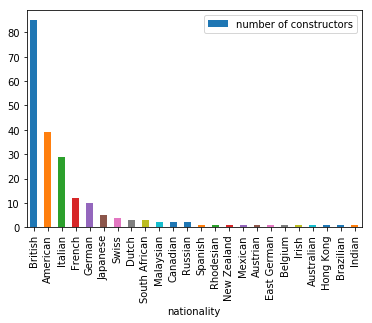

In [51]:
from matplotlib import pyplot as plt

# setup the backend for matplotlib
# the commands starting with "%" are IPython/Jupyter kernel commands

%matplotlib inline

df_team_nationalities.plot(x="nationality", y="number of constructors", kind='bar')

***
We can do<br/>
f1_drivers = pd.read_csv('data/drivers.csv'
                         , usecols=["driverId", "forename", "surname", "dob", "nationality"])<br/>
But why not **read form the database?**

In [52]:
from sqlalchemy import create_engine
from sqlalchemy.engine import url

connect_url = url.URL(
    'oracle+cx_oracle',
    username='f1_user',
    password='f1_user',
    host='localhost',
    port='1521',
    query=dict(service_name='orclpdb1'))
engine = create_engine(connect_url)

f1_drivers = pd.read_sql("SELECT * FROM drivers", engine)
f1_drivers.head()

,driver_id,driver_number,driver_code,forename,surname,dob,nationality
0,1,44.0,HAM,Lewis,Hamilton,1985-01-07,British
1,2,NaN,HEI,Nick,Heidfeld,1977-05-10,German
2,3,6.0,ROS,Nico,Rosberg,1985-06-27,German
3,4,14.0,ALO,Fernando,Alonso,1981-07-29,Spanish
4,5,NaN,KOV,Heikki,Kovalainen,1981-10-19,Finnish


In [53]:
# The columns=[] option doesn't work!
f1_drivers = pd.read_sql("SELECT driver_id, forename, surname, dob, nationality FROM drivers"
                          , engine
                          , index_col="driver_id")

f1_drivers.head()

,forename,surname,dob,nationality
driver_id,,,,
1,Lewis,Hamilton,1985-01-07,British
2,Nick,Heidfeld,1977-05-10,German
3,Nico,Rosberg,1985-06-27,German
4,Fernando,Alonso,1981-07-29,Spanish
5,Heikki,Kovalainen,1981-10-19,Finnish


In [54]:
f1_drivers.index.names=["driverId"]
f1_drivers.head()

,forename,surname,dob,nationality
driverId,,,,
1,Lewis,Hamilton,1985-01-07,British
2,Nick,Heidfeld,1977-05-10,German
3,Nico,Rosberg,1985-06-27,German
4,Fernando,Alonso,1981-07-29,Spanish
5,Heikki,Kovalainen,1981-10-19,Finnish


In [ ]:
# f1_drivers = pd.read_csv('data/drivers.csv'
#                          , usecols=["driverId", "forename", "surname", "dob", "nationality"])
# f1_drivers.head()
# f1_drivers = f1_drivers.loc[:, ["driverId", "forename", "surname", "dob", "nationality"]]

## Find the Top 10 drivers who have raced more than others ##

In [55]:
#f1_restuls = pd.read_csv('data/results.csv', usecols=["raceId", "driverId", "constructorId", "grid", "position", "fastestLapSpeed"])
f1_restuls = pd.read_excel('data/results.xlsx', usecols=[1, 2, 3, 16])
driver_race = f1_restuls[["driverId", "raceId"]]

In [56]:
driver_race.head()

,driverId,raceId
0,1,18
1,2,18
2,3,18
3,4,18
4,5,18


## value_counts() can be applied to Series
### value_counts() method = a "group by" and a count
### by default the values are sorted (DESC) based on the count
#### Similar to:
`SELECT driverId, COUNT(*)`<br/>
`FROM driver_race`<br/>
`GROUP BY driverID`<br/>
`ORDER BY 2 DESC`<br/>

**Note:** Generates a new Series, indexed by driverId

In [57]:
driver_race["driverId"].value_counts().head(10)

22     326
18     309
30     308
4      293
8      273
13     271
119    257
15     256
14     247
21     231
Name: driverId, dtype: int64

In [ ]:
type(driver_race["driverId"].value_counts())

In [58]:
# To retrieve a meaningful resultset, we have to
# join the result of aggregation to the list of drivers.
# Join can only happen between DataFrames

driver_race_counts = driver_race["driverId"].value_counts()

# By using reset_index() we're transformin the aggregation result
# to a DataFrame

driver_race_counts = driver_race_counts.reset_index(name="race count")

driver_race_counts.head()


,index,race count
0,22,326
1,18,309
2,30,308
3,4,293
4,8,273


In [59]:
# Note: The first column doesn't have an appropriate name
# because it was created using a Series
# and the Series data doesn't have a column name
# Therefore we might want to give it a proper name

driver_race_counts.columns = ["driverId", "race count"]
driver_race_counts.set_index("driverId")
driver_race_counts.head()

,driverId,race count
0,22,326
1,18,309
2,30,308
3,4,293
4,8,273


## Joining DataFrames ##
### Joining driver_race_counts and f1_drivers ##

In [ ]:
f1_drivers.head()

In [60]:
driver_race_counts.join(f1_drivers, on = "driverId").head(10)

,driverId,race count,forename,surname,dob,nationality
0,22,326,Rubens,Barrichello,1972-05-23,Brazilian
1,18,309,Jenson,Button,1980-01-19,British
2,30,308,Michael,Schumacher,1969-01-03,German
3,4,293,Fernando,Alonso,1981-07-29,Spanish
4,8,273,Kimi,Raikkonen,1979-10-17,Finnish
5,13,271,Felipe,Massa,1981-04-25,Brazilian
6,119,257,Riccardo,Patrese,1954-04-17,Italian
7,15,256,Jarno,Trulli,1974-07-13,Italian
8,14,247,David,Coulthard,1971-03-27,British
9,21,231,Giancarlo,Fisichella,1973-01-14,Italian


## You can also use "Merge"

### How to do Left/Right/Outer joins?
#### Use how='left'
#### or how = 'right'
#### or how = 'outer'

In [62]:
top10_most_raced = pd.merge(driver_race_counts, f1_drivers, on = "driverId").head(10)
top10_most_raced

,driverId,race count,forename,surname,dob,nationality
0,22,326,Rubens,Barrichello,1972-05-23,Brazilian
1,18,309,Jenson,Button,1980-01-19,British
2,30,308,Michael,Schumacher,1969-01-03,German
3,4,293,Fernando,Alonso,1981-07-29,Spanish
4,8,273,Kimi,Raikkonen,1979-10-17,Finnish
5,13,271,Felipe,Massa,1981-04-25,Brazilian
6,119,257,Riccardo,Patrese,1954-04-17,Italian
7,15,256,Jarno,Trulli,1974-07-13,Italian
8,14,247,David,Coulthard,1971-03-27,British
9,21,231,Giancarlo,Fisichella,1973-01-14,Italian


In [63]:
# You can change the order of DFs but if you
# do not drive the join using a pre-sorted DF,
# the result has to be explicitly sorted afterwards.

pd.merge(f1_drivers, driver_race_counts, on = "driverId") \
    .sort_values(by='race count', ascending=[0]) \
    .head(10)

,driverId,forename,surname,dob,nationality,race count
21,22,Rubens,Barrichello,1972-05-23,Brazilian,326
17,18,Jenson,Button,1980-01-19,British,309
29,30,Michael,Schumacher,1969-01-03,German,308
3,4,Fernando,Alonso,1981-07-29,Spanish,293
7,8,Kimi,Raikkonen,1979-10-17,Finnish,273
12,13,Felipe,Massa,1981-04-25,Brazilian,271
118,119,Riccardo,Patrese,1954-04-17,Italian,257
14,15,Jarno,Trulli,1974-07-13,Italian,256
13,14,David,Coulthard,1971-03-27,British,247
20,21,Giancarlo,Fisichella,1973-01-14,Italian,231


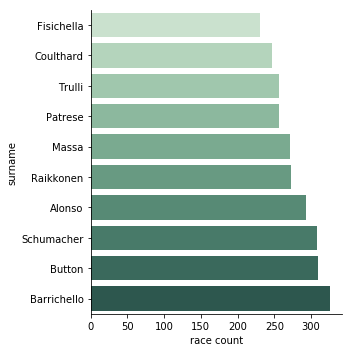

In [64]:
import seaborn as sns
sns.catplot(y="surname"
            , x="race count"
            , kind="bar"
            , data=top10_most_raced.sort_values(by='race count')
            , palette = "ch:2.5,-.2,dark=.3"
            , orient="h");

***
## PandaSQL: Query DataFrames using SQL
#### Note: last active: 1 Feb, 2017
Read more about the project [here](https://pypi.org/project/pandasql/).

In [ ]:
import pandasql as pdsql
pysql = lambda q: pdsql.sqldf(q, globals())

In [ ]:
top10_most_raced

In [ ]:
pysql("select * from top10_most_raced order by 2 limit 5")

***
## Q: Which drivers have spent most of their careers racing for one team?

In [ ]:
constructor_driver_marriage = pysql("""
select 
    c.name as Constructor_Name, 
    d.forename || ' ' || d.surname as Driver_Name, 
    count(*) as cnt 
from f1_restuls r
join f1_constructors c
    on r.constructorId = c.constructorId
join f1_drivers d
    on d.driverId = r.driverId
group by r.driverId, r.constructorId
order by 3 desc
limit 20""")

constructor_driver_marriage

***

## Storing DataFrames
### to_pickle()

In [ ]:
constructor_driver_marriage.to_pickle('./constructor_driver_marriage.pkl')

In [ ]:
cdm = pd.read_pickle('./constructor_driver_marriage.pkl')
cdm

## to_csv()

In [ ]:
constructor_driver_marriage.to_csv('./constructor_driver_marriage.csv')

***
# Q: What has been the effect of rule changes in the max speed in different circuits?

In [ ]:
f1_results = pd.read_csv('data/results.csv', usecols = ["raceId", "driverId", "constructorId", "fastestLapSpeed"]).dropna()
f1_results['fastestLapSpeed'] = pd.to_numeric(f1_results['fastestLapSpeed'])
f1_results.head()

In [ ]:
import numpy as np
fastestLapPerRace = f1_results.groupby("raceId", as_index=False).agg({'fastestLapSpeed': np.max})

#f1_results.groupby("raceId").fastestLapSpeed.agg('max').head().reset_index().head()

fastestLapPerRace.head()

In [ ]:
f1_races = pd.read_csv('data/races.csv', usecols = ["raceId", "year", "circuitId"], dtype={'raceId': int, 'year': int, 'circuitId': int})
f1_races.head()

In [ ]:
fastestLapPerCuircuitYear = fastestLapPerRace.merge(f1_races, on="raceId")[["year", "circuitId", "fastestLapSpeed"]]

Melbourne_SpeedChanges = fastestLapPerCuircuitYear.query('circuitId==1')
Monza_SpeedChanges = fastestLapPerCuircuitYear.query('circuitId==14')


In [ ]:
import matplotlib.pyplot as plt
Melbourne_SpeedChanges.plot(x='year', y='fastestLapSpeed', kind='scatter')

In [ ]:
Monza_SpeedChanges.plot(x='year', y='fastestLapSpeed', kind='scatter')

In [ ]:
fastestLaps = pd.merge(fastestLapPerRace, f1_races, on="raceId")
fastestLaps = fastestLaps[["year", "circuitId", "fastestLapSpeed"]]

f1_circuits = pd.read_csv('data/circuits.csv')
fastestLaps = pd.merge(fastestLaps, f1_circuits, on="circuitId")[["year", "location", "fastestLapSpeed"]]

popular_races = fastestLaps.groupby('location').size().reset_index(name = "races").query('races==14')
fastestLaps = pd.merge(fastestLaps, popular_races, on="location")[["year", "location", "fastestLapSpeed"]]


In [ ]:
sns.catplot(y="location", x="fastestLapSpeed", kind="box", data=fastestLaps, orient = "h");

In [ ]:
sns.catplot(x="year", y="fastestLapSpeed", hue="location", height=7, aspect=2,
            kind="point", data=fastestLaps);

***

## How to install Jupyter Lab?

You can use the link [here](https://jupyterlab.readthedocs.io/en/stable/getting_started/installation.html)

## Python for PL/SQL Developers

Five part video/text tutorials by Arup Nanda can be found [here](https://community.oracle.com/docs/DOC-1005069)


# Recommended:

* Pandas From The Inside [video](https://youtu.be/YGk09nK_xnM)
* Towards Pandas 1.0 by Marc Garcia [video](https://youtu.be/hK6o_TDXXN8)
* PyData Youtube Channel [link](https://www.youtube.com/user/PyDataTV/videos)
* PyData community [link](https://pydata.org/)<br/>
Extremely vibrant community almost completely reliant on volunteers<br/>
Very cheap conferences, containing workshops